In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mat

In [5]:
!ls ../indeed_data_science_exercise/

test_features_2013-03-07.csv  train_salaries_2013-03-07.csv
train_features_2013-03-07.csv


In [6]:
# Importing the train data sets

# train_salaries
salary_df = pd.read_csv('../indeed_data_science_exercise/train_salaries_2013-03-07.csv')

# train_features
features_df = pd.read_csv('../indeed_data_science_exercise/train_features_2013-03-07.csv')

# Both data sets have the same number of rows
print('Salary data shape: {}'.format(salary_df.shape))
print('Features data shape: {}'.format(features_df.shape))

Salary data shape: (1000000, 2)
Features data shape: (1000000, 8)


## Salary Data Munging

In [8]:
# Salary feature appears to be in the 
salary_df.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [15]:
# Reviewing data types and no changes need to be made
salary_df.dtypes

jobId     object
salary     int64
dtype: object

In [12]:
# No null values
salary_df.isnull().sum()

jobId     0
salary    0
dtype: int64

In [13]:
# looking at data grouping 
salary_df.nunique()

jobId     1000000
salary        280
dtype: int64

In [28]:
print('Top Ten Highest Salaries')
print(salary_df['salary'].value_counts().sort_index(ascending=False)[:10])
print()
print('Bottom Ten Lowest Salaries ')
print(salary_df['salary'].value_counts().sort_index(ascending=False)[-10:])


Top Ten Highest Salaries
301    2
298    1
294    2
293    2
292    2
290    1
289    3
288    2
287    2
286    3
Name: salary, dtype: int64

Bottom Ten Lowest Salaries 
25    173
24    129
23    107
22     63
21     49
20     43
19     10
18      3
17      1
0       5
Name: salary, dtype: int64


Text(0.5,0,'Salary [$ x 1000]')

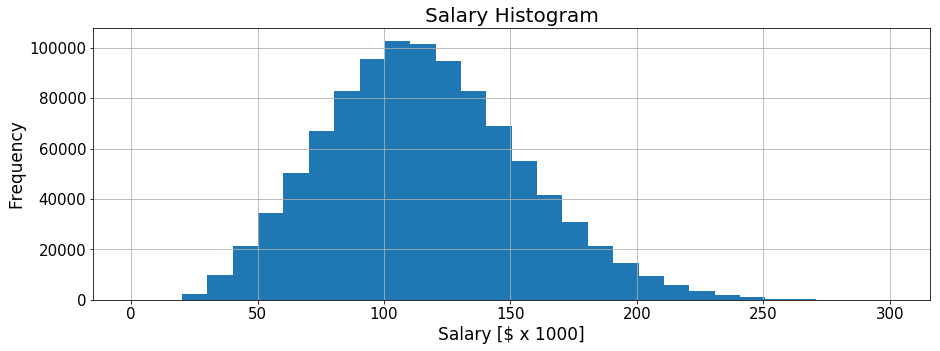

In [125]:
# Distribution of salaries follows a normal distribution
plt.figure(figsize=(15,5))
salary_df['salary'].hist(bins=30)
plt.title('Salary Histogram', fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Frequency', fontsize=17)
plt.yticks(fontsize=15)
plt.xlabel('Salary [$ x 1000]', fontsize=17)

## Features Data Munging

In [44]:
features_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [45]:
# continuous featurs are integers
# will need to run a get_dummies on categorical featueres after merging the 2 DataFrames
features_df.dtypes

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
dtype: object

In [46]:
# no null values...thank god!
features_df.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [60]:
features_df.nunique()

jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
dtype: int64

In [66]:
# reviewing the breakout of the catgorical columns
# from above you can see there are 63 unique company id's, was going to consider removing 'COMP' from this column 
#  and coverting to integers, but will still need to treat them as categorical so will not do that
cat_columns = features_df.columns.tolist()[2:6]

for col in features_df[cat_columns].columns:
    print(col)
    print('-'*25)
    print(features_df[col].value_counts())
    print()

print('There will be {} new features after encoding'.format(features_df.nunique()[1:6].sum() - 5))

jobType
-------------------------
SENIOR            125886
VICE_PRESIDENT    125235
MANAGER           125121
CTO               125046
JANITOR           124971
CEO               124778
JUNIOR            124594
CFO               124369
Name: jobType, dtype: int64

degree
-------------------------
HIGH_SCHOOL    236976
NONE           236854
BACHELORS      175495
DOCTORAL       175364
MASTERS        175311
Name: degree, dtype: int64

major
-------------------------
NONE           532355
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58596
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57801
Name: major, dtype: int64

industry
-------------------------
WEB          143206
AUTO         142943
FINANCE      142867
EDUCATION    142819
OIL          142771
HEALTH       142755
SERVICE      142639
Name: industry, dtype: int64

There will be 87 new features after encoding


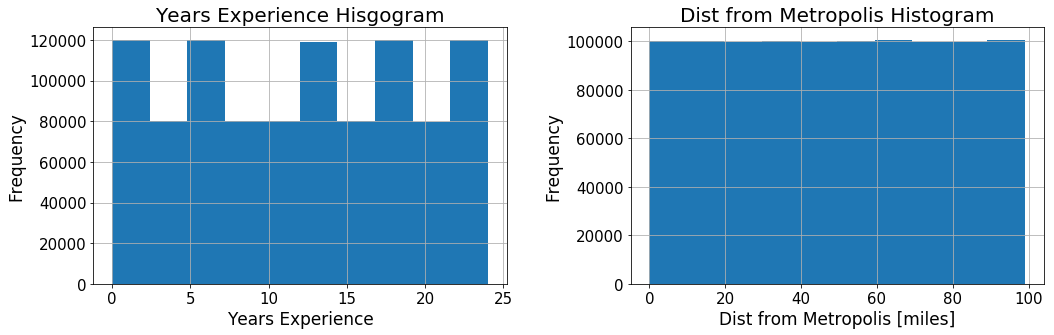

In [132]:
# The assumption that years experienc and distance from metro were continuous, but that does not seem to be the case

# With increaseing the bin sizes you can visually see the data grouping into 6 categories
plt.subplot(121)
features_df['yearsExperience'].hist()
plt.title('Years Experience Hisgogram', fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Years Experience', fontsize=17)
plt.yticks(fontsize=15)
plt.ylabel('Frequency', fontsize=17)


plt.subplot(122)
features_df['milesFromMetropolis'].hist()
plt.title('Dist from Metropolis Histogram', fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Dist from Metropolis [miles]', fontsize=17)
plt.yticks(fontsize=15)
plt.ylabel('Frequency', fontsize=17)

plt.subplots_adjust(top=0.9, 
                    bottom=.01, 
                    left=.2, 
                    right=2.4, 
                    hspace=.8,
                    wspace=0.3)

In [121]:
# Years experience will need to be encoded also
# good thing is that there is no drastic class imbalance among all the categories
features_df['yearsExperience'].value_counts().sort_index()

0     39839
1     40265
2     40045
3     40191
4     40036
5     40013
6     40095
7     40047
8     40118
9     40235
10    40032
11    39949
12    39467
13    39826
14    39827
15    40312
16    39873
17    40072
18    40089
19    39860
20    39988
21    39759
22    40187
23    40015
24    39860
Name: yearsExperience, dtype: int64

## Join the DataFrames and Pre-process for Modeling

In [82]:
# New DataFrame with both Salaries and Features left joined on 'jobid'
df = pd.merge(left=salary_df, right=features_df, how='left', on='jobId')

In [83]:
df.head()

,jobId,salary,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,130,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,101,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,137,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,142,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,163,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [92]:
# Createing a variable for the columns to be encoded
encode_features = df.columns.tolist()[2:7]
encode_features

['companyId', 'jobType', 'degree', 'major', 'industry']

In [96]:
# Create a DataFrame of the encoded columns
encoded = pd.get_dummies(df[encode_features])

In [99]:
# Joining the encoded features back into df and calling it 'encoded_df'
encoded_df = pd.concat([df,encoded], axis=1)

encoded_df.head()

,jobId,salary,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,companyId_COMP0,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,JOB1362684407687,130,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,0,...,1,0,0,0,0,0,1,0,0,0
1,JOB1362684407688,101,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,0,...,0,1,0,0,0,0,0,0,0,1
2,JOB1362684407689,137,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,0,...,0,0,1,0,0,0,1,0,0,0
3,JOB1362684407690,142,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,0,...,0,0,0,1,0,0,0,0,0,0
4,JOB1362684407691,163,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,0,...,0,0,1,0,0,1,0,0,0,0


In [102]:
# Making a CSV copy of the cleaned and encoded data just incase
encoded_df.to_csv('../indeed_data_science_exercise/salary_data.csv')